In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
class TicTacToe:
    def __init__(self):
        self.player, self.opponent = 'o', 'x'

    def printboard(self,board):
        print(' {} | {} | {}'.format(board[0][0], board[0][1], board[0][2]))
        print('---+---+---')
        print(' {} | {} | {}'.format(board[1][0], board[1][1], board[1][2]))
        print('---+---+---')
        print(' {} | {} | {}'.format(board[2][0], board[2][1], board[2][2]))
        print('\n')
    
    def isMovesLeft(self,board) :
        for i in range(3) :
            for j in range(3) :
                if (board[i][j] == '_') :
                    return True
        return False
    
    def check_winner(self, board):
        for row in board:
            if row[0] != '_' and row[0] == row[1] == row[2]:
                return row[0]

        for col in range(3):
            if board[0][col] != '_' and board[0][col] == board[1][col] == board[2][col]:
                return board[0][col]

        if board[0][0] != '_' and board[0][0] == board[1][1] == board[2][2]:
            return board[0][0]
        if board[0][2] != '_' and board[0][2] == board[1][1] == board[2][0]:
            return board[0][2]

        return None

    
    def evaluate(self,b) :
        for row in range(3) :
            if (b[row][0] == b[row][1] and b[row][1] == b[row][2]) :
                if (b[row][0] == self.player) :
                    return 10
                elif (b[row][0] == self.opponent) :
                    return -10

        for col in range(3) :
            if (b[0][col] == b[1][col] and b[1][col] == b[2][col]) :
                if (b[0][col] == self.player) :
                    return 10
                elif (b[0][col] == self.opponent) :
                    return -10
                
        if (b[0][0] == b[1][1] and b[1][1] == b[2][2]) :
            if (b[0][0] == self.player) :
                return 10
            elif (b[0][0] == self.opponent) :
                return -10

        if (b[0][2] == b[1][1] and b[1][1] == b[2][0]) :
            if (b[0][2] == self.player) :
                return 10
            elif (b[0][2] == self.opponent) :
                return -10

        return 0
    
    def minimax(self, board, depth, alpha, beta, isMax, isPrun) :
        score = self.evaluate(board)
        if (score == 10) :
            return score

        if (score == -10) :
            return score

        if (self.isMovesLeft(board) == False) :
            return 0
        
        if depth==0:
            return 0
        

        if (isMax) :
            best = -1000
            for i in range(3) :
                for j in range(3) :
                    if (board[i][j]=='_') :
                        board[i][j] = self.player
                        best = max( best, self.minimax(board,depth - 1, alpha, beta, not isMax, isPrun))
                        board[i][j] = '_'
                        if not isPrun:
                            alpha = max(alpha, best)
                            if beta <= alpha:
                                break
            return best
        
        else :
            best = 1000
            for i in range(3) :
                for j in range(3) :

                    if (board[i][j] == '_') :
                        board[i][j] = self.opponent
                        best = min(best, self.minimax(board, depth - 1, alpha, beta, not isMax, isPrun))
                        board[i][j] = '_'
                        if not isPrun:
                            alpha = max(alpha, best)
                            if beta <= alpha:
                                break
                        
            return best
        
    def get_best_move(self, board, depth, isPrun):
        bestVal = -1000
        bestMove = (-1, -1)
        alpha = -1000
        beta = 1000
        for i in range(3) :
            for j in range(3) :
                if (board[i][j] == '_') :
                    board[i][j] = self.player
                    moveVal = self.minimax(board, depth-1, alpha, beta, False, isPrun)
                    board[i][j] = '_'
                    if (moveVal > bestVal) :
                        bestMove = (i, j)
                        bestVal = moveVal
                    if not isPrun:
                        alpha = max(alpha, bestVal)
                        if beta <= alpha:
                            break

        return bestMove

In [3]:
winning_combinations = [
    [(0, 0), (0, 1), (0, 2)],  
    [(1, 0), (1, 1), (1, 2)],  
    [(2, 0), (2, 1), (2, 2)],  
    [(0, 0), (1, 0), (2, 0)], 
    [(0, 1), (1, 1), (2, 1)],  
    [(0, 2), (1, 2), (2, 2)], 
    [(0, 0), (1, 1), (2, 2)],  
    [(0, 2), (1, 1), (2, 0)]   
]

def get_computer_move(board):
    for combination in winning_combinations:
        values = [board[row][col] for row, col in combination]
        if values.count('o') == 2 and values.count('_') == 1:
            for row, col in combination:
                if board[row][col] == '_':
                    return row, col
    
    for combination in winning_combinations:
        values = [board[row][col] for row, col in combination]
        if values.count('x') == 2 and values.count('_') == 1:
            for row, col in combination:
                if board[row][col] == '_':
                    return row, col
    
    while True:
        row = random.randint(0, 2)
        col = random.randint(0, 2)
        if board[row][col] == '_':
            return row, col


In [4]:
class TicTacToeQ:
    def __init__(self, alpha, gamma, epsilon):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = dict()
        self.winning_combinations = [
                        (0, 1, 2), (3, 4, 5), (6, 7, 8),
                        (0, 3, 6), (1, 4, 7), (2, 5, 8),
                        (0, 4, 8), (2, 4, 6)            
                        ]
        
        
    def printboard(self, state):
        state = [' ' if x==0 else x for x in state]
        state = ['x' if x==1 else x for x in state]
        state = ['o' if x==2 else x for x in state]
        print(' {} | {} | {}'.format(state[0], state[1], state[2]))
        print('---+---+---')
        print(' {} | {} | {}'.format(state[3], state[4], state[5]))
        print('---+---+---')
        print(' {} | {} | {}'.format(state[6], state[7], state[8]))
        print('\n')
        
        
        
    def endgame(self, state):
        check = 1
        if state[0] == check and state[4] == check and state[8] == check:
            return check
        if state[2] == check and state[4] == check and state[6] == check:
            return check
        for i in range(3):
            if (
                state[i * 3] == check
                and state[i * 3 + 1] == check
                and state[i * 3 + 2] == check
            ):
                return check
        for i in range(3):
            if state[i] == check and state[3 + i] == check and state[6 + i] == check:
                return check
        check = 2
        if state[0] == check and state[4] == check and state[8] == check:
            return check
        if state[2] == check and state[4] == check and state[6] == check:
            return check
        for i in range(3):
            if (
                state[i * 3] == check
                and state[i * 3 + 1] == check
                and state[i * 3 + 2] == check
            ):
                return check
        for i in range(3):
            if state[i] == check and state[3 + i] == check and state[6 + i] == check:
                return check
        if len([i for i in range(len(state)) if state[i] == 0]) == 0:
            return -1
        return 0
        
    def get_computer_move(self, state):
        for combination in self.winning_combinations:
            if state[combination[0]] == state[combination[1]] == 1 and state[combination[2]] == 0:
                return combination[2]
            elif state[combination[0]] == state[combination[2]] == 1 and state[combination[1]] == 0:
                return combination[1]
            elif state[combination[1]] == state[combination[2]] == 1 and state[combination[0]] == 0:
                return combination[0]
        for combination in self.winning_combinations:
            if state[combination[0]] == state[combination[1]] == 2 and state[combination[2]] == 0:
                return combination[2]
            elif state[combination[0]] == state[combination[2]] == 2 and state[combination[1]] == 0:
                return combination[1]
            elif state[combination[1]] == state[combination[2]] == 2 and state[combination[0]] == 0:
                return combination[0]
        while True:
            move = random.randint(0, 8)
            if state[move] == 0:
                return move 
            
    def check_win(self, state):
        for i in range(3):
            if state[i*3] == state[i*3+1] == state[i*3+2] != 0:
                return state[i*3]

        for i in range(3):
            if state[i] == state[i+3] == state[i+6] != 0:
                return state[i]

        if state[0] == state[4] == state[8] != 0:
            return state[0]
        if state[2] == state[4] == state[6] != 0:
            return state[2]

        return 0
    
    
    def get_all_actions(self, state):
        for i in range(9):
            if (state, i) in self.Q:
                print(i, ":", self.Q[(state, i)])
                
                
    def find_mov(self, state, turn):
        side = 1 if turn == 1 else -1
        empty_pos = [i for i in range(len(state)) if state[i] == 0]
        if random.random() < self.epsilon:
            first_try = True
            for pos in empty_pos:
                if (state, pos) not in self.Q:
                    self.Q[(state, pos)] = random.random() * 2 - 1
                if first_try:
                    max_Q = side * self.Q[(state, pos)]
                    max_a = pos
                    first_try = False
                else:
                    if side * self.Q[(state, pos)] > max_Q:
                        max_Q = side * self.Q[(state, pos)]
                        max_action = pos
            return pos
        return random.choice(empty_pos)
    
    
    
    def reward(self, state):
        ret = self.endgame(state)
        if ret == 1:
            return 1000
        if ret == 2:
            return -1000
        return 0
    
    
    
    def max_action(self, Q, state):
        state = tuple(state)
        empty_pos = [i for i in range(len(state)) if state[i] == 0]
        first_try = True
        max_action = -1
        max_Q = 0
        for pos in empty_pos:
            if (state, pos) not in Q:
                Q[(state, pos)] = random.random() * 2 - 1
            if first_try:
                max_Q = Q[(state, pos)]
                max_action = pos
                first_try = False
            else:
                if Q[(state, pos)] > max_Q:
                    max_Q = Q[(state, pos)]
                    max_action = pos
        return max_action, max_Q


    def min_action(self, Q, state):
        state = tuple(state)
        empty_pos = [i for i in range(len(state)) if state[i] == 0]
        first_try = True
        min_a = -1
        min_Q = 0
        for pos in empty_pos:
            if (state, pos) not in Q:
                Q[(state, pos)] = random.random() * 2 - 1
            if first_try:
                min_Q = Q[(state, pos)]
                min_a = pos
                first_try = False
            else:
                if Q[(state, pos)] < min_Q:
                    min_Q = Q[(state, pos)]
                    min_a = pos
        return min_a, min_Q


    def show_state(self, state):
        for i in range(3):
            for j in range(3):
                print(state[i * 3 + j], end=" ")
            print()
        print()

    
    def rem(self, array, val):
        for item in array:
            if item ==val:
                array.remove(item)
                
                
    def QAgent(self, it):
        for i in range(it):
            current_state = (0, 0, 0, 0, 0, 0, 0, 0, 0)
            while self.endgame(current_state) == 0:

                # O Moves (1's Turn)
                turn = 1
                next_state = list(current_state)
                mov = self.find_mov(current_state, turn)
                next_state[mov] = turn
                m_a, m_Q = self.min_action(self.Q, next_state)
                if (current_state, mov) not in self.Q:
                    self.Q[(current_state, mov)] = random.random() * 2 - 1
                self.Q[(current_state, mov)] = self.Q[(current_state, mov)] + self.alpha * (self.reward(next_state) + self.gamma * m_Q - self.Q[(current_state, mov)])
                current_state = tuple(next_state)

                if self.endgame(current_state) != 0:
                    break

                current_state = tuple(next_state)

        #         X Moves (2's Turn)
                turn = 2
                next_state = list(current_state)
                mov = self.find_mov(current_state, turn)
                next_state[mov] = turn
                m_a, m_Q = self.max_action(self.Q, next_state)
                if (current_state, mov) not in self.Q:
                    self.Q[(current_state, mov)] = random.random() * 2 - 1
                self.Q[(current_state, mov)] = self.Q[(current_state, mov)] + self.alpha * (self.reward(next_state) + self.gamma * m_Q - self.Q[(current_state, mov)])

                current_state = tuple(next_state)

                if self.endgame(current_state) != 0:
                    break

                current_state = tuple(next_state)
        
        

In [5]:
game1 = TicTacToeQ(0.1,0.8,0.4)
game1.QAgent(20000)

In [158]:
def run(jj, itera, ddd, display):
    wins_minmax = []
    wins_qlearning = []
    ties = []

    game = TicTacToe()


    for itera in range(itera):

        board = [
        [ '_', '_', '_' ],
        [ '_', '_', '_' ],
        [ '_', '_', '_' ]
    ]
        s = (0, 0, 0, 0, 0, 0, 0, 0, 0)

        i = jj
        depth = ddd
        isPrun = True

        player = 1
        opponent = 2
        moves_array = []

        first_try = True


        if i==0:
            game.player = 'x'
            game.opponent = 'o'
        else:
            game.player = 'o'
            player = 2
            game.opponent = 'x'
            opponent = 1



        random_index = random.randint(0,8)
        c = random_index%3
        r = random_index//3
        s = list(s)


        if i==1:
            if display:
                print('Q-Learning')
            board[r][c] = game.opponent
            s[r*3+c] = opponent
        else:
            if display:
                print('Minmax')
            board[r][c] = game.player
            s[r*3+c] = player

        if display:
            print('default')
            game.printboard(board)
            print('q-l')
            game1.printboard(s)

    #     game.printboard(board)


        while not game.check_winner(board):


            if i%2==0:
                if display:
                    print('Q-Learning')
                if len(moves_array)>=8:
                    break
    #             move_i, move_j = get_computer_move(board)
    #             moves_array.append((move_i,move_j))

                a, b = game1.max_action(game1.Q,s)
                s = list(s)
                s[a] = opponent
                c = a%3
                r = a//3
                s = tuple(s)
                board[r][c] = game.opponent
    #             print(a,r,c)
                moves_array.append((r,c))





            else:
                if display:
                    print('Minmax')
                best_move = game.get_best_move(board, depth, isPrun)
                board[best_move[0]][best_move[1]] = game.player
    #             moves_array.append((best_move[0],best_move[1]))
                s = list(s)
    #             print(best_move[1]*3 + best_move[0],best_move[1],best_move[0])
                s[best_move[0]*3 + best_move[1]] = player
                s = tuple(s)

                if best_move[0]==-1:
                    break



    #         print(s)         
            if display:
                print('default')
                game.printboard(board)
                print('q-l')
                game1.printboard(s)
            i = i + 1






    #     print('----------------------------',itera)

        if len(moves_array)>=8:
    #         print('Its a Tie')
            ties.append(1)

        else:
            if game.check_winner(board) == game.opponent:
    #             print('Computer Wins')
                wins_qlearning.append(1)
            else:
    #             print('Smart Random Wins')
                wins_minmax.append(1)
    return wins_qlearning, wins_minmax, ties

In [207]:
game1 = TicTacToeQ(0.1,0.8,0.4)
game1.QAgent(50000)

In [219]:
a,b,c = run(1, 100, 1, 0)
print(len(a))
print(len(b))
print(len(c))

81
19
0


In [209]:
a,b,c = run(1, 100, 2, 0)
print(len(a))
print(len(b))
print(len(c))

54
46
0


In [210]:
a,b,c = run(1, 100, 3, 0)
print(len(a))
print(len(b))
print(len(c))

55
45
0


In [211]:
a,b,c = run(1, 100, 4, 0)
print(len(a))
print(len(b))
print(len(c))

55
45
0


In [212]:
a,b,c = run(1, 100, 5, 0)
print(len(a))
print(len(b))
print(len(c))

52
48
0


In [213]:
a,b,c = run(1, 100, 6, 0)
print(len(a))
print(len(b))
print(len(c))

0
100
0


In [228]:
game1 = TicTacToeQ(0.1,0.8,0.4)
game1.QAgent(500000)

In [232]:
a,b,c = run(0, 100, 1, 0)
print(len(a))
print(len(b))
print(len(c))

0
100
0


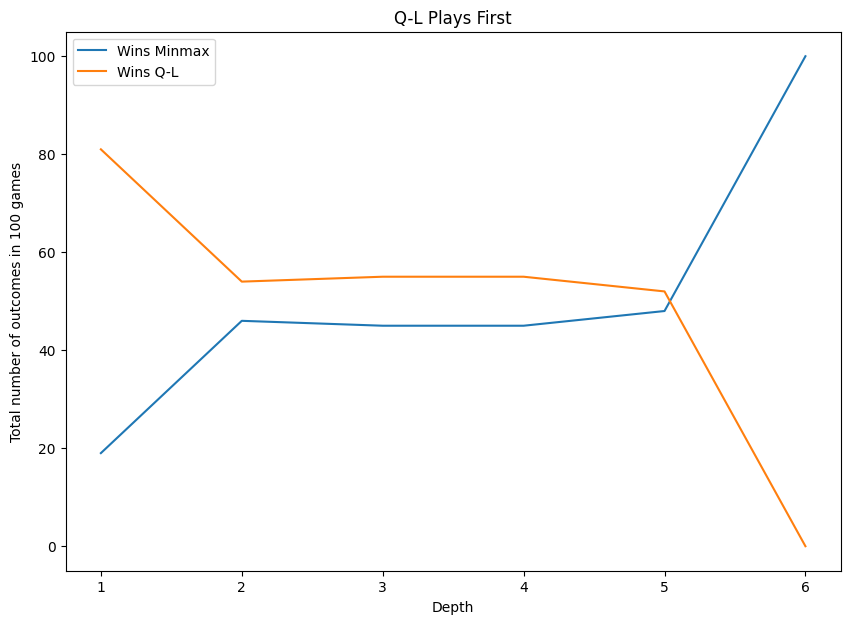

In [235]:
wins_minmax = [19, 46, 45,  45, 48, 100]
wins_ql = [81, 54, 55, 55,  52, 0]
depth = [1, 2, 3, 4, 5, 6 ]

plt.figure(figsize=(10, 7),dpi=100)

plt.plot(depth,wins_minmax,label = 'Wins Minmax')
plt.plot(depth,wins_ql,label = 'Wins Q-L')


plt.title("Q-L Plays First")
plt.xlabel('Depth')
plt.ylabel('Total number of outcomes in 100 games') 
plt.legend()
plt.show()